# Size decrease in female and male Chinook salmon
## Group 4:
Cheuk-lun Cheung, Diana Gawol, Allan Hu, Xinyi Wang,

# Introduction
Research has demonstrated that all Pacific salmon species have declined in size over the past century (Oke et al., 2020). Contrary to common belief, this decrease in size is likely due to reaching the ocean’s carrying capacity due to the release of large numbers of hatchery-raised fish, rather than overfishing (Oke et al., 2020). 

As a fish, size matters: Larger female fish have a greater fecundity (number of eggs per female) as well as larger eggs. Larger eggs are positively correlated with greater chance of juvenile survival, while a greater number of eggs allow to produce greater numbers of juveniles. 
Males are subjected to their own set of selective pressures, however, their size does not determine how many eggs they are able to fertilize. Because of this difference in biological dependence on size, we want to investigate whether the observed overall decline in size in Chinook salmon (Oncorhynchus tshawytscha)  is predominantly driven by a decline in size in male rather than female fish. For this, we will compare the differences in medians in male and female fish from the 1960s versus the 2010s. We hypothesize that male fish experienced a greater decrease in size than female fish. 

To investigate this question, we examine the extensive, long-term dataset of Pacific salmon catch data from Alaska used by Oke et al. to demonstrate the overall size decrease over the last century. One caveat of this data is that sex determination is unreliable in ocean-caught Chinook. Therefore, we will only use data from Chinook caught for subsistence. Subsistence fishing, as practiced by First Nation communities in Alaska, occurs mostly during the spawning runs when morphological differences between male and females become more apparent - especially to the trained eye of the Indigenous fisher. We further filter our data for standardized methods of length measurements. 

We choose the `median` as a location parameter. From a biological standpoint, the `median` is the most suitable and better representation of the data rather than the mean because it represents the “middle” of fish size rather than the average of fish size. The median is less influenced by extreme outliers that are present in the data. 

Our scale parameter is the `interquartile range`. With our location parameter being `median`, a standard deviation is not applicable. The data is not normally distributed and shows no central tendency due to the presence of extreme outliers.


# Methods and Results

## Libraries
The following packages were utilized in this report:

In [1]:
set.seed(2023) # Randomization
library(cowplot)
library(infer)
library(repr)
library(tidyverse)
library(broom)
library(digest)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Data Acquisition
We ran into processing issues because our original data file is quite large (>3GB). 
Therefore, we had performed one initial filtering step to select data for our species of interest, Chinook salmon, in R outside of Jupyter. 
We then uploaded that file (chinook.csv) to github to access for this script.

In [2]:
## This is the code to download the original data from the web and the initial filtering steps we performed.
# master <- read_csv("https://knb.ecoinformatics.org/knb/d1/mn/v2/object/urn%3Auuid%3A478e0569-a61b-4339-86d7-7ab3849dc8d4")

## Look at data.
#head(master)

## Look at column names to select the ones of interest.
#colnames(master)

## Look at the different types of fishing methods used. 
#levels(as.factor(master$ASLProjectType))

## Filter data for our species and columns of interest
#chinook <- master %>%
#  filter(Species == "chinook") %>%
#  select(Species, Length, Weight, Sex, sampleYear, ASLProjectType, Length.Measurement.Type) %>%
#  na.omit(Species, Length, Weight, Sex, sampleYear, ASLProjectType, Length.Measurement.Type) 

## This is the point at which we downloaded chinook.csv from R and placed it to github.
## It can be accessed here:
chinook <- read.csv("https://raw.githubusercontent.com/GChroma/Stat201-group-project-4/main/data/chinook.csv")

## Look at the data.
head(chinook)

,Species,Length,Weight,Sex,sampleYear,ASLProjectType,Length.Measurement.Type
,<chr>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>
1,chinook,1070,498,male,1968,commercial catch,mid-eye to fork of tail
2,chinook,890,320,female,1968,commercial catch,mid-eye to fork of tail
3,chinook,888,440,female,1968,commercial catch,mid-eye to fork of tail
4,chinook,955,330,female,1968,commercial catch,mid-eye to fork of tail
5,chinook,870,250,male,1968,commercial catch,mid-eye to fork of tail
6,chinook,887,270,female,1968,commercial catch,mid-eye to fork of tail


## Filtering
We performed several filtering steps to remove confounding factors as best as possible. First off, we are only interested in Chinook salmon as many populations of this species are of particular conservation concern. We then remove all data with unknown or unidentified sex. To only include data with reliable sex determination, we only use fish caught in subsistence fisheries. We then create a new variable to group years into decades to have more manageble groups of data to work with. Finally, we only select our columns and decades of interest (1960s and 2010s) for analysis. The individual filtering steps and preliminary results are shown below.

In [3]:
## Look at the different sexes assigned.
levels(as.factor(chinook$Sex))

## Remove all unknown sex. 
chinook_sex_known <- chinook %>%
  filter(!(Sex %in% c("unknown", "examined but did not identify"))) 

[1] "examined but did not identify" "female"                       
[3] "male"                          "unknown"

In [4]:
## Look at levels of fishing methods.
levels(as.factor(chinook$ASLProjectType))

[1] "commercial catch"  "escapement"        "sport catch"      
[4] "subsistence catch" "test fishing"

In [5]:
## Filter for subsistence fishing and use of "mid-eye to fork of tail" for consistent length measurements.
chinook_subsistence <- chinook_sex_known %>%
  filter(ASLProjectType == "subsistence catch",
         Length.Measurement.Type == "mid-eye to fork of tail")

In [6]:
## Look which years are represented after all that filtering.
levels(as.factor(chinook_subsistence$sampleYear))

[1] "1964" "1968" "1970" "1977" "1979" "1982" "2005" "2006" "2008" "2009"
[11] "2010" "2011" "2012"

In [7]:
## Create column to assign decades.
chinook_subsistence <- chinook_subsistence %>%
  mutate(sampleDecade = ifelse(sampleYear %in% 1960:1969, "1960s",
                                 ifelse(sampleYear %in% 1970:1979, "1970s", 
                                        ifelse(sampleYear %in% 1980:1989, "1980s",
                                               ifelse(sampleYear %in% 2000:2009, "2000s",
                                                      ifelse(sampleYear %in% 2010:2019, "2010s", "unassigned"))))))

In [8]:
## Select just the columns we will need for analysis

chinook_subsistence <- chinook_subsistence %>%
    select(Sex, Length, sampleDecade)

head(chinook_subsistence)

,Sex,Length,sampleDecade
,<chr>,<int>,<chr>
1,male,710,2010s
2,female,850,2010s
3,female,910,2010s
4,male,770,2010s
5,female,800,2010s
6,male,780,2010s


## Preliminary Results
Box plots (Fig. 1) show the distributions of female and male Chinook salmon lengths throughout a few decades. 
We can see that:
1. Females and males both decreased in length
2. Males appear to be have decresed to a greater extend than females

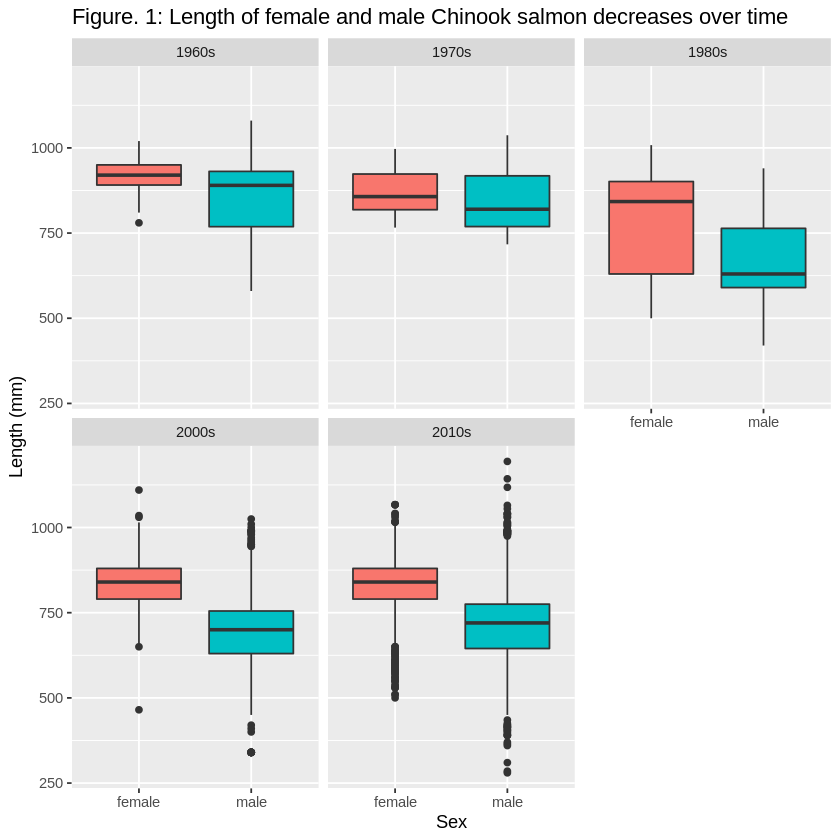

In [9]:
## Overview plot of length of females and males throughout the decades.
plot_overview <- chinook_subsistence %>%
  ggplot(aes(Length, Sex, fill = Sex)) +
  geom_boxplot() +
  theme(legend.position = "none") +
  facet_wrap(~ sampleDecade) +
  coord_flip() +
  ggtitle(("Figure. 1: Length of female and male Chinook salmon decreases over time")) +
  xlab("Length (mm)")
plot_overview

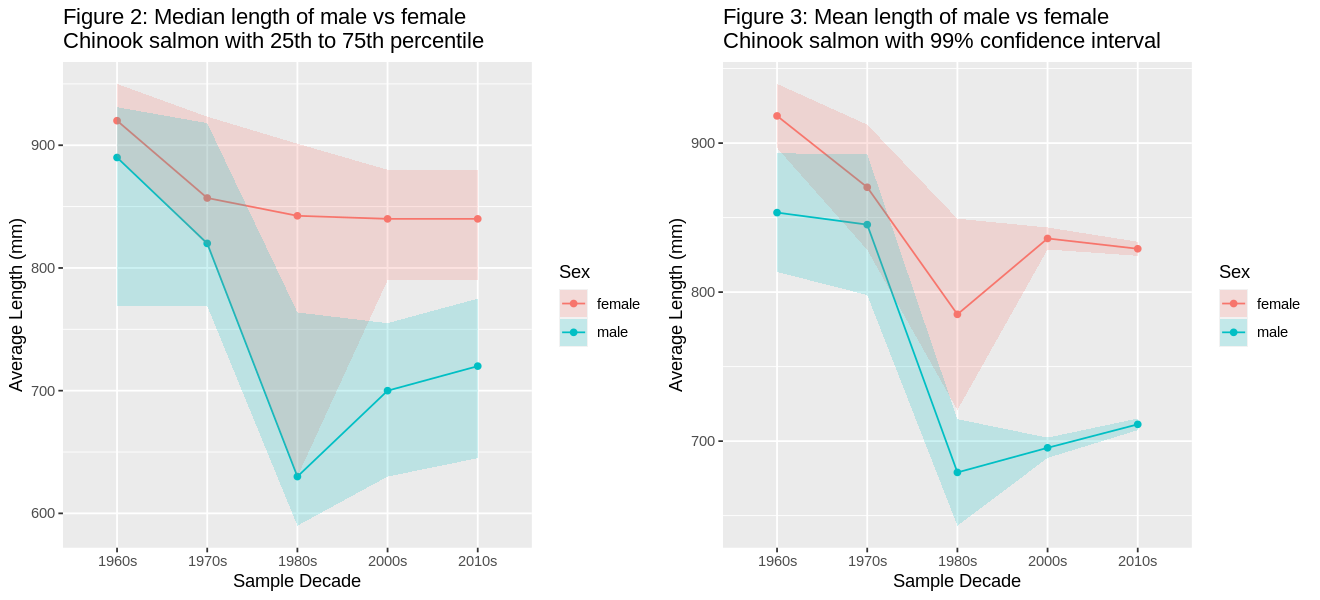

In [10]:
## Overview plot of length of females and males throughout the decades.
line_data <- chinook_subsistence |>
    group_by(sampleDecade, Sex) |>
    summarize(n = n(),
               mean = mean(Length),
               sd = sd(Length),
               std_error = sd(Length)/sqrt(n()),
               lower_ci = qnorm(0.005, mean, std_error),  # lower boundary of the 99% confidence interval
               upper_ci = qnorm(0.995, mean, std_error),  # upper boundary of the 99% confidence interval
               median = median(Length),
               q_25 = quantile(Length, probs = 0.25),  # 25th percentile; bottom of Q1
               q_75 = quantile(Length, probs = 0.75),  #75th percentile; top of Q3
               `.groups` = "drop")

plot_medians_q <- ggplot(data= line_data, aes(x= sampleDecade, y = median, group = Sex )) +
  geom_line(aes(x = sampleDecade, y= median, color = Sex)) +
  ggtitle(("Figure 2: Median length of male vs female
Chinook salmon with 25th to 75th percentile")) +
  labs(x = "Sample Decade", y = "Average Length (mm)") +
  geom_point(aes(color = Sex)) +
  geom_ribbon(aes(ymin = q_25, ymax = q_75, fill = Sex), alpha = 0.2)

plot_mean_ci <- ggplot(data= line_data, aes(x= sampleDecade, y = mean, group = Sex )) +
  geom_line(aes(x = sampleDecade, y= mean, color = Sex)) +
  ggtitle(("Figure 3: Mean length of male vs female
Chinook salmon with 99% confidence interval")) +
  labs(x = "Sample Decade", y = "Average Length (mm)") +
  geom_point(aes(color = Sex)) +
  geom_ribbon(aes(ymin = lower_ci, ymax = upper_ci, fill = Sex), alpha = 0.2)

options(repr.plot.width = 11, repr.plot.height = 5)
plot_grid(plot_medians_q, plot_mean_ci)


Figure 2 and 3 visually compare summary statistics by showing the median with shaded area of the 25th to 75th percentile to the mean with a shaded area with the 99% confidence interval. We can see that the median captures the middle of the data better than the mean.

In [11]:
## Drop the decades we will not use.
chinook_1960_2010 <- chinook_subsistence %>%
    filter(sampleDecade %in% c("1960s","2010s"))

head(chinook_1960_2010)

,Sex,Length,sampleDecade
,<chr>,<int>,<chr>
1,male,710,2010s
2,female,850,2010s
3,female,910,2010s
4,male,770,2010s
5,female,800,2010s
6,male,780,2010s


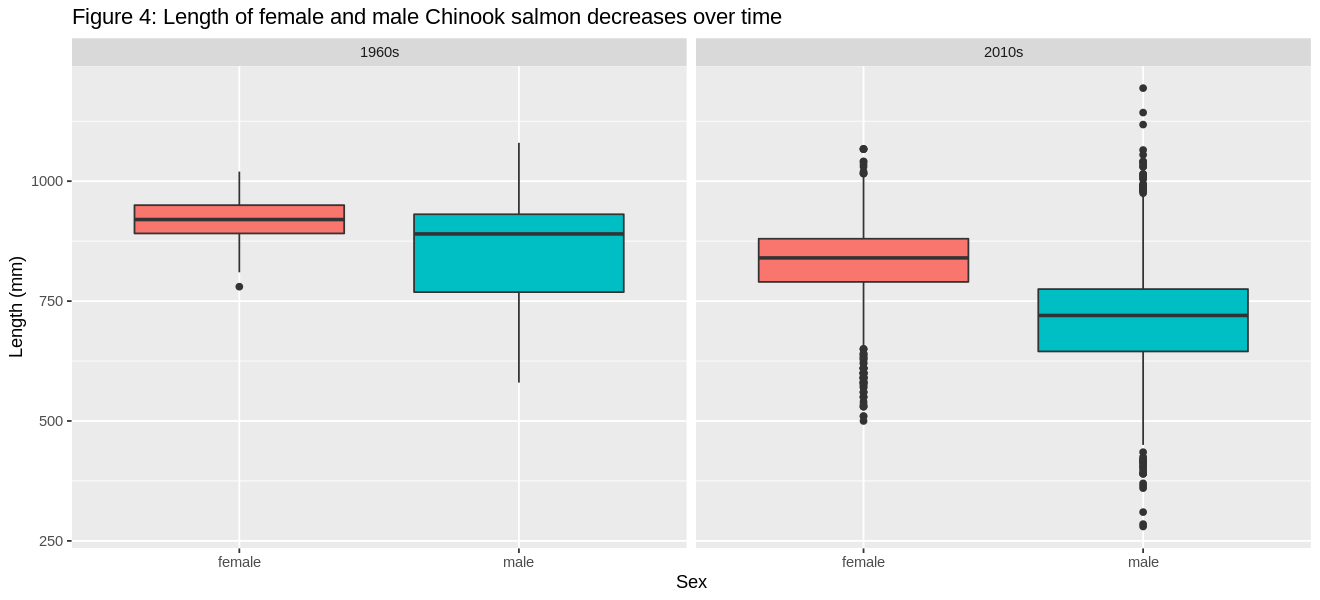

In [12]:
## Overview plot of length of females and males of just the decades we will use.
plot_overview <- chinook_1960_2010 %>%
  ggplot(aes(Length, Sex, fill = Sex)) +
  geom_boxplot() +
  theme(legend.position = "none") +
  facet_wrap(~ sampleDecade) +
  coord_flip() +
  ggtitle(("Figure 4: Length of female and male Chinook salmon decreases over time")) +
  xlab("Length (mm)")
plot_overview

Finally, figure 4 shows the distributions of Chinook salmon length for females and males for just the two decades we will be analyzing. It is important to note that the variance of the male salmon lengths in the 1960s is rather large. This makes it unclear from just looking at this plot whether the decrease in male salmon is indeed greater than in females as we hypothesize.

In [13]:
# Summary of the data. Get 99% Confidence interval of mean lengths

chinook_summary_ci <-
     chinook_1960_2010 %>% 
     group_by(Sex, sampleDecade) %>% 
     summarise(n = n(),
               mean = mean(Length),
               sd = sd(Length),
               std_error = sd(Length)/sqrt(n()),
               lower_ci = qnorm(0.005, mean, std_error),  # lower boundary of the 99% confidence interval
               upper_ci = qnorm(0.995, mean, std_error),  # upper boundary of the 99% confidence interval
               median = median(Length),
               q_25 = quantile(Length, probs = 0.25),  # 25th percentile; bottom of Q1
               q_75 = quantile(Length, probs = 0.75),  #75th percentile; top of Q3
               `.groups` = "drop")
chinook_summary_ci

Sex,sampleDecade,n,mean,sd,std_error,lower_ci,upper_ci,median,q_25,q_75
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
female,1960s,41,918.2439,53.42835,8.344107,896.7509,939.7369,920,891.00,950
female,2010s,1750,829.0823,77.02088,1.841151,824.3398,833.8248,840,790.00,880
male,1960s,56,853.3393,115.66068,15.455808,813.5278,893.1508,890,768.75,931
male,2010s,4752,711.2652,104.56733,1.516903,707.3579,715.1724,720,645.00,775


Table 1: Summary statistics for length data of female and male Chinook salmon in the 1960s and 2010s.

## Data analysis
From our plots (Fig. 3), it is not discernable whether the differences in size decrease we are seeing are statistically significant from our plots. Thus, we will perform the following analyses.

For each sex, we will first confirm that fish from the 1960s are longer than fish from the 2010s:
For this, the **null hypothesis** is that there is no difference in the difference of medians from 1960s to 2010s in female and male fish. 
The **alternative hypothesis** is that 1960s fish are significantly larger than the 2010s fish. This is a one-sided test via simulation of the null-distribution.
$$
\begin{align*}
H_0&: m_{\text{1960s}} - m_{\text{2010s}} = 0 \\ 
H_1&: m_{\text{1960s}} - m_{\text{2010s}} > 0 \\ 
\end{align*}
$$
We will test these hypotheses via simulation of the null distribution and calculate associated p-values. We set our significance level set to $\alpha$ = 0.05 and the confidence level (1-$\alpha$).

We expect that male fish experienced a greater decrease in size relative to the females, as mentioned in the introduction. These findings will offer important insights into sex-based trends in fish size decreases.

### Hypothesis testing via simulation

In [14]:
# First, we filter for male fish and use a bootstrapping method to test our null hypothesis.
chinook_male <- chinook_1960_2010 |>
    filter(Sex == "male") |>
    select(sampleDecade, Length)
head(chinook_male)

# The observed test statistic is the difference in medians of male fish between the 1960s and the 2010s.
diff_medians_males_1960s_2010s <- chinook_male |>
    group_by(sampleDecade) |>
    summarise(median = median(Length)) |>
    pivot_wider(names_from = sampleDecade, values_from = median) |>
    rename(sixties = 1, tens = 2) |>
    transmute(diff = sixties - tens) |>
    pull(diff) 

result <- paste("The difference in medians of male fish between the 1960s and 2010s is",diff_medians_males_1960s_2010s, "mm.")

result

,sampleDecade,Length
,<chr>,<int>
1,2010s,710
2,2010s,770
3,2010s,780
4,2010s,750
5,2010s,680
6,2010s,840


[1] "The difference in medians of male fish between the 1960s and 2010s is 170 mm."

In [15]:
# Using the Infer package, generate the null model
null_model_male_chinook <- 
    chinook_male |>
    specify(formula = Length ~ sampleDecade) |> 
    hypothesize(null = "independence") |>
    generate(reps = 5000, type = "permute") |>
    calculate(stat="diff in medians", order = c("1960s", "2010s"))

In [16]:
#Visualize the null model with our observed test statistic as a red line
null_model_male_chinook_plot <- null_model_male_chinook |>
    visualize(fill = "blue") + 
    shade_p_value(obs_stat = diff_medians_males_1960s_2010s, direction = "right") +
    xlab("Difference in medians of male Chinook salmon length (mm)") +
    ggtitle("Figure 5: Male Chinook salmon test statistic compared
to null model")

In [17]:
# Finally, get the p-value from the model
p_value_males <-
    null_model_male_chinook %>% 
    get_p_value(obs_stat = diff_medians_males_1960s_2010s, direction = "right")
p_value_males

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


In [18]:
# Repeat simulation for female fish

# Filter for female fish and use a bootstrapping method to test our null hypothesis.
chinook_female <- chinook_1960_2010 |>
    filter(Sex == "female") |>
    select(sampleDecade, Length)
head(chinook_female)

# The observed test statistic is the difference in medians of male fish between the 1960s and the 2010s.
diff_medians_females_1960s_2010s <- chinook_female |>
    group_by(sampleDecade) |>
    summarise(median = median(Length)) |>
    pivot_wider(names_from = sampleDecade, values_from = median) |>
    rename(sixties = 1, tens = 2) |>
    transmute(diff = sixties - tens) |>
    pull(diff)

result2 <- paste("The difference in medians of female fish between the 1960s and 2010s is",diff_medians_females_1960s_2010s, "mm.")
result2

,sampleDecade,Length
,<chr>,<int>
1,2010s,850
2,2010s,910
3,2010s,800
4,2010s,860
5,2010s,860
6,2010s,990


[1] "The difference in medians of female fish between the 1960s and 2010s is 80 mm."

In [19]:
# Using the Infer package, generate the null model
null_model_female_chinook <- 
    chinook_female |>
    specify(formula = Length ~ sampleDecade) |> 
    hypothesize(null = "independence") |>
    generate(reps = 5000, type = "permute") |>
    calculate(stat="diff in medians", order = c("1960s", "2010s"))

#Visualize the null model with our observed test statistic as a red line
null_model_female_chinook_plot <- null_model_female_chinook |>
    visualize() + 
    shade_p_value(obs_stat = diff_medians_females_1960s_2010s, direction = "right") +
    xlab("Difference in medians of female Chinook salmon length (mm)") +
    ggtitle("Figure 6: Female Chinook salmon test statistic compared
to null model")

In [20]:
# Finally, get the p-value from the model

p_value_females <-
    null_model_female_chinook %>% 
    get_p_value(obs_stat = diff_medians_females_1960s_2010s, direction = "right") 
    
p_value_females

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


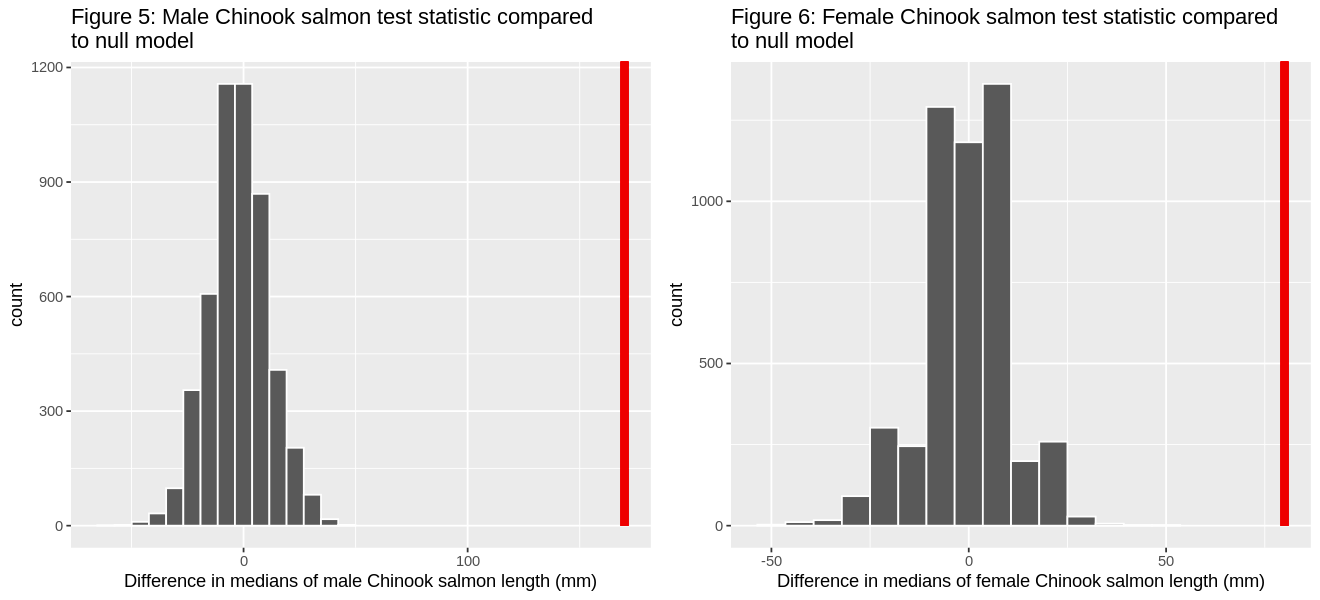

In [21]:
# Plot both null model plots 
plot_grid(null_model_male_chinook_plot, null_model_female_chinook_plot)

The above tests demonstrate that both female and male fish decreased significantly in size between the 1960s and 2010s (p-value < 0.05). Though a true p-value of 0 is impossible, the value of 0 is returned in some cases due to the simulation-based nature of the {infer} package. All we can conclude from these results is that the likelihood of a type I error is extremely low.


## Bootstrapping to obtain sampling distribution of differences of size decrease in females and males
The difference in medians between 1960s and 2010s is greater in male fish (170 mm) than in female fish (80 mm). However, a sampling distribution is required to conclude whether this difference is significant. We will use bootstrapping to obtain the sampling distribution of the difference in median length from 1960s to 2010s in females (&Delta;-Females) and males (&Delta;-Males). 

We hypothesize that &Delta;-Females < &Delta;-Males. The null hypothesis is &Delta;-Females = &Delta;-Males.

Following genereation of the bootstrap distributions, we conduct a Welch two-sample t-test to test our hypothesis at a significanze level of $\alpha$ = 0.05 and the confidence level (1-$\alpha$).




In [22]:
# Bootstrap to get distribution of differences of the median for  males
head(chinook_male)

bootstrap_diff_median_males <- chinook_male %>%
  specify(formula = Length ~ sampleDecade) |> 
    generate(reps = 5000, type = "bootstrap") |>
    calculate(stat="diff in medians", order = c("1960s", "2010s"))

bootstrap_diff_median_males_plot <- bootstrap_diff_median_males %>%
  visualize() +
  ggtitle("Figure 7: Simulation-based bootstrap distribution of 
Delta-Males") +
  xlab("Difference in median length from 1960s to 2010s")



,sampleDecade,Length
,<chr>,<int>
1,2010s,710
2,2010s,770
3,2010s,780
4,2010s,750
5,2010s,680
6,2010s,840


In [23]:
# Bootstrap to get distribution of differences of the median for females
head(chinook_female)

bootstrap_diff_median_females <- chinook_female %>%
  specify(formula = Length ~ sampleDecade) |> 
    generate(reps = 5000, type = "bootstrap") |>
    calculate(stat="diff in medians", order = c("1960s", "2010s"))

bootstrap_diff_median_females_plot <- bootstrap_diff_median_females %>%
  visualize() +
   ggtitle("Figure 8: Simulation-based bootstrap distribution of 
Delta-Females") +
  xlab("Difference in median length from 1960s to 2010s")



,sampleDecade,Length
,<chr>,<int>
1,2010s,850
2,2010s,910
3,2010s,800
4,2010s,860
5,2010s,860
6,2010s,990


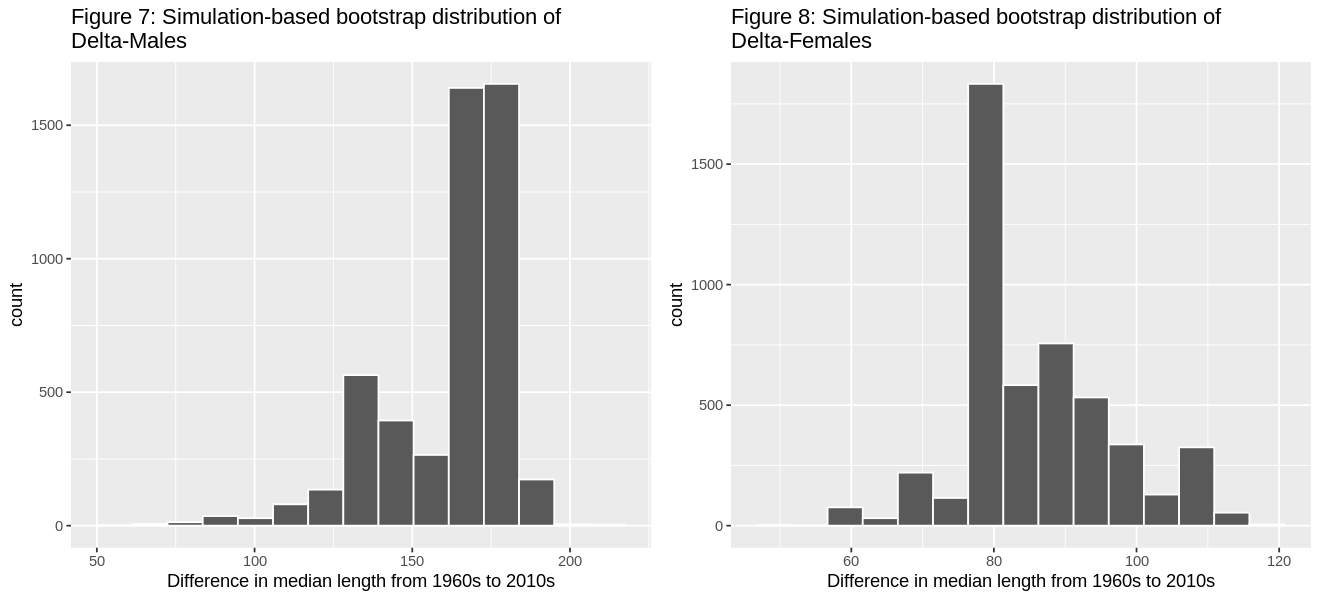

In [24]:
plot_grid(bootstrap_diff_median_males_plot, bootstrap_diff_median_females_plot)

Figures 7 and 8 show the bootstrap distributions of &Delta;-Males and &Delta;-Females. We can see that the distributions are not normal. We do not have enough computing power to perform more replicates in the bootstrap. Due to the non-normal distributions, we will use the Wilcoxon test to determine the p-value for the difference in medians of &Delta;-Males and &Delta;-Females.

For the female chinook salmon, a Wilcoxon Rank Sum test will be used to determine if the medians of female chinook salmon length between the 1960s and 2010s are clear. To perform this test, we must make the following assumptions about the data base:
1. The two samples are independent of each other
2. The populations have equal variance
3. The samples have the same distribution

Since the 1960s and 2010s samples are two independent samples of one very large population of fish, it is reasonable that  variance and distribution are similar, so we are confident that these assumptions will not greatly skew our results (Islam, 2021).

In [25]:
# Hypothesis test for difference in medians of the bootstrap distributions 
tidy(wilcox.test(bootstrap_diff_median_males$stat, bootstrap_diff_median_females$stat)) %>%
pull(p.value)

[1] 0

Again, we see a p-value of 0. We repeat the test without tidy formatting to get a  better  indication of the p-value.

In [26]:
wilcox.test(bootstrap_diff_median_males$stat, bootstrap_diff_median_females$stat)


	Wilcoxon rank sum test with continuity correction

data:  bootstrap_diff_median_males$stat and bootstrap_diff_median_females$stat
W = 24817325, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


We see that the p-value < 2.2e-16. We can reject the null hypothesis and conclude that the change in size in male Chinook salmon is greater than in females in the time from the 1960s to 2010s.

# Discussion
Our analysis suggests that the overall decline in Chinook salmon from the 1960s to 2010s is driven by a greater size decrease in males than females. Nonetheless, both sexes decreased significantly in size. We filtered the data in such a way as to ensure that sex determination data is as accurate as possible. These results are interesting because they indicate that male and female fish experience different selective pressures in regard to body size, but somewhat expected since we know the importance of body size for female reproductive success. There are many further questions that can be developed with this finding:
1. How much of an effect do selective pressures play in the difference in size decrease between female and male fish?
2. What is the relationship between size and survival in male fish given no expected correlation from this data?
3. Looking at these trends, what will be the minimum size salmon will reach?
4. How far will this trend result in the development of a "new" sexual dimorphism of body size?
5. How does the evolution in our population compare to other populations with various different selective pressures? Is there a difference?

# References
Dickerson, B. R., Quinn, T. P., & Willson, M. F. (2002). Body size, arrival date, and reproductive success of pink salmon, Oncorhynchus gorbuscha. *Ethology Ecology & Evolution, 14*(1), 29–44. doi:10.1080/08927014.2002.9522759

Islam, M. (2021). Two-sample t-test with Mean and Median difference. RPubs. https://rpubs.com/mominulislam2329/TwoSamplettestwithMeanandMedianDifference

Malick, M. J., Losee, J. P., Marston, G., Agha, M., Berejikian, B. A., Beckman, B. R., & Cooper, M. (n.d.). Fecundity trends of Chinook salmon in the Pacific Northwest. *Fish and Fisheries, n/a*(n/a). https://doi.org/10.1111/faf.12738

Oke, K.B., Cunningham, C.J., Westley, P.A.H., Baskett, M.L., Carlson, S.M., Clark, J., Hendry, A.P., Karatayev, V.A., Kendall, N.W., Kibele, J., Kindsvater, H.K., Kobayashi, K.M., Lewis, B., Munch, S., Reynolds, J.D., Vick, G.K., Palkovacs, E.P. (2020). Recent declines in salmon body size impact ecosystems and fisheries. *Nature Communications, 11*(1), 4155. doi:10.1038/s41467-020-17726-z
